{
  "n": 2,
  "delta": 0.01,
  "deltaQ": 0.05,
  "player_type": "moving_range",
  "noise_function": "uniform",
  "noise_delta": 0.01,
  "radius": 2,
  "filename": 1736367562
}


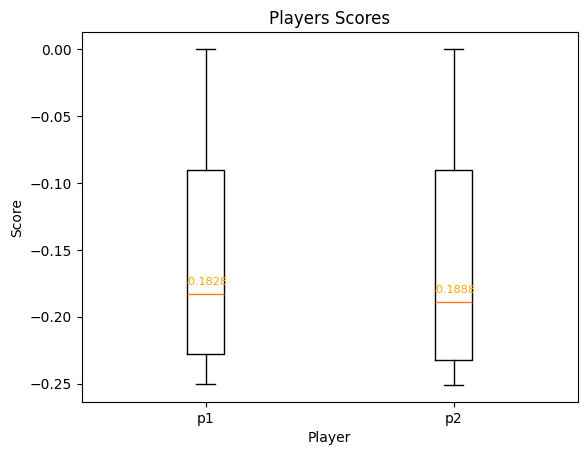

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json

filename = "1736367562"
with open(f'../results/{filename}.json', 'r') as f:
    data = json.load(f)

scores = data['scores']
players = [f'p{i+1}' for i in range(len(scores[0]))]
column_values = list(zip(*scores))

fig, ax = plt.subplots()
boxplot = ax.boxplot(column_values, tick_labels=players, notch=False)

for i, line in enumerate(boxplot['medians']):
  median_value = line.get_ydata()[0]
  x = line.get_xdata().mean()
  ax.annotate(f'{median_value:.4f}', xy=(x, median_value), xytext=(0, 5), fontsize=8,
    textcoords='offset points', ha='center', va='bottom', color='orange')

ax.set_xlabel('Player')
ax.set_ylabel('Score')
ax.set_title('Players Scores')

config = data['config']
config_text = json.dumps(config, indent=2)
print(config_text)
#plt.gcf().text(0.02, 0.5, config_text, fontsize=8, va='center', ha='left', bbox=dict(facecolor='white', alpha=0.5))

plt.show()